# PKU-MMD

http://www.icst.pku.edu.cn/struct/Projects/PKUMMD.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from os.path import isdir

root = Settings['data_root']

from pak.datasets.PKU_MMD import PKU_MMD, plot_skeleton

data = PKU_MMD(root)

#data.train_videos

skel1, skel2, labels = data.get_3d('0002-L')


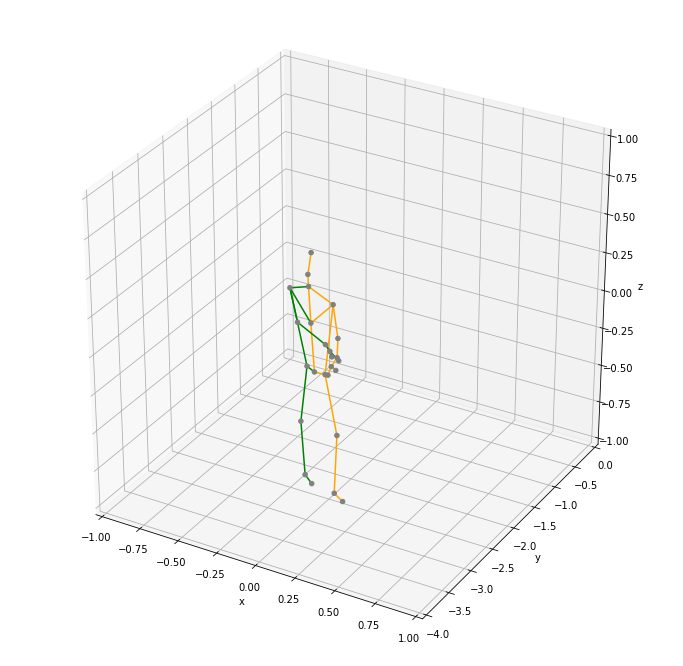

In [2]:
s1 = skel1[0]
s2 = skel2[0]


fig = plt.figure(figsize=(12, 12))
R = 1
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-R, R); ax.set_xlabel('x')
ax.set_ylim(-2-R*2, 0); ax.set_ylabel('y')
ax.set_zlim(-R, R); ax.set_zlabel('z')


plot_skeleton(ax, s1)

plt.show()

In [3]:
data.action_id_to_action_name

{1: 'bow',
 2: 'brushing hair',
 3: 'brushing teeth',
 4: 'check time (from watch)',
 5: 'cheer up',
 6: 'clapping',
 7: 'cross hands in front (say stop)',
 8: 'drink water',
 9: 'drop',
 10: 'eat meal/snack',
 11: 'falling',
 12: 'giving something to other person',
 13: 'hand waving',
 14: 'handshaking',
 15: 'hopping (one foot jumping)',
 16: 'hugging other person',
 17: 'jump up',
 18: 'kicking other person',
 19: 'kicking something',
 20: 'make a phone call/answer phone',
 21: 'pat on back of other person',
 22: 'pickup',
 23: 'playing with phone/tablet',
 24: 'point finger at the other person',
 25: 'pointing to something with finger',
 26: 'punching/slapping other person',
 27: 'pushing other person',
 28: 'put on a hat/cap',
 29: 'put something inside pocket',
 30: 'reading',
 31: 'rub two hands together',
 32: 'salute',
 33: 'sitting down',
 34: 'standing up',
 35: 'take off a hat/cap',
 36: 'take off glasses',
 37: 'take off jacket',
 38: 'take out something from pocket',
 39: